# 통계적 추론(statistical inference)

- 모집단에서 추출한 표본을 이용하여 모집단의 특성(모수)을 예측하는 과정
- 추정, 가설검정

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 4
np.random.seed(1111)

## 1. 추정(estimation)

### 예제. 성적 데이터(모집단)

In [101]:
df = pd.read_csv('data/scores400.csv')
df.head()

,score
0,76
1,55
2,80
3,80
4,74


#### 성적데이터 모집단의 평균과 분산

In [102]:
p_mean = np.mean(df.score)
p_var = np.var(df.score)
p_std = np.std(df.score)

print(f'모평균:{p_mean}, 모분산:{p_var:.3f}, 모표준편차:{p_std:.3f}')

모평균:69.53, 모분산:206.669, 모표준편차:14.376


#### 모집단 분포 시각화
- 성적데이터의 평균과 분산을 갖는 정규분포와 성적데이터에 대한 히스토그램

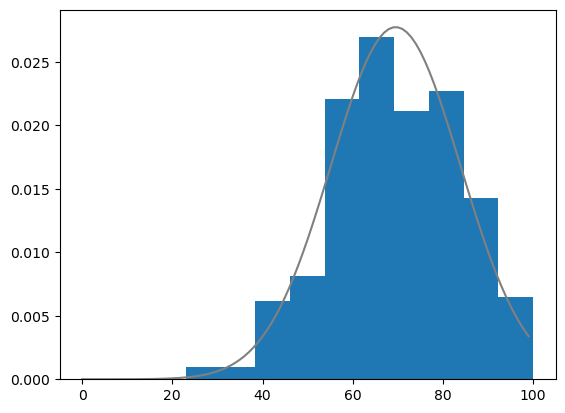

In [103]:
xs = np.arange(0,100)
rv = stats.norm(p_mean, p_std)
plt.hist(df.score, density=True)
plt.plot(xs, rv.pdf(xs), color='gray')
plt.show()

### 표본 추출

In [104]:
n = 100
sample1 = np.random.choice(df.score, size=n)
sample2 = np.random.choice(df.score, size=n)

### 모평균의 점추정

In [105]:
s_mean1 = sample1.mean()
s_mean1

69.2300

In [106]:
s_mean2 = sample2.mean()
s_mean2

69.2400

### 모평균의 구간추정(confidence interval)

**참고**
1) 정규분포 관련 함수들

- stat.norm(평균, 표준편차) : 평균과 표준편차의 정규분포를 따르는 확률변수 생성
- .pdf(확률변수) : 밀도함수 계산
- .cdf(확률변수) : 누적분포함수 P(X<=확률변수)
- .isf(alpha) : 상위 alpha%가 되는 확률변수값 반환
- .interval(alpha) : 확률이 alpha가 되는 가운데 부분의 구간 반환

2) t분포 관련 함수들

- stat.t(df=자유도) : 자유도를 따르는 t분포의 확률변수 생성
- .pdf(확률변수) : 밀도함수 계산
- .cdf(확률변수) : 누적분포함수 P(X<=확률변수)
- .isf(alpha) : 상위 alpha%가 되는 확률변수값 반환
- .interval(alpha) : 확률이 alpha가 되는 가운데 부분의 구간 반환

#### sample1 데이터를 이용한 모평균에 대한 95% 신뢰구간

#### ① 모분산을 아는 경우

$ \bar X ± Z_{\alpha / 2} {\sigma / \sqrt{n}}$

In [107]:
rv = stats.norm()
rv.isf(0.025)

1.9600

In [108]:
rv.isf(0.975)

-1.9600

In [109]:
alpha = 0.05 #95% 신뢰수준
s_mean = sample1.mean()
eb =  rv.isf(alpha/2) * df.score.std() / np.sqrt(n)
lower = s_mean - eb
upper = s_mean + eb
print(f'모평균에 대한 {(1-alpha)*100}% 신뢰구간 : ({lower:.2f}, {upper:.2f})')

모평균에 대한 95.0% 신뢰구간 : (66.41, 72.05)


In [110]:
def mu_CI(sample, sigma, alpha):
    s_mean = sample.mean()
    n = len(sample)
    eb =  stats.norm().isf(alpha/2) * sigma / np.sqrt(n)
    lower = s_mean - eb
    upper = s_mean + eb
    print(f'모평균에 대한 {(1-alpha)*100}% 신뢰구간 : ({lower:.2f}, {upper:.2f})')
    
alpha = 0.05 #95% 신뢰수준
sigma = df.score.std()
mu_CI(sample1, sigma, alpha)

모평균에 대한 95.0% 신뢰구간 : (66.41, 72.05)


In [111]:
mu_CI(sample2, sigma, alpha)

모평균에 대한 95.0% 신뢰구간 : (66.42, 72.06)


#### ② 모분산을 모르는 경우
- 표본의 크기가 충분히 큰 경우
- $ \bar X ± Z_{\alpha / 2} { S / \sqrt{n}}$

In [153]:
def mu_CI(sample, sigma=None, alpha=0.05):
    s_mean = sample.mean()
    n = len(sample)
    if sigma:
        eb =  stats.norm().isf(alpha/2) * sigma / np.sqrt(n)
    elif n>=30:
        eb =  stats.norm().isf(alpha/2) * sample.std() / np.sqrt(n)
    else:
        eb =  stats.t(n-1).isf(alpha/2) * sample.std() / np.sqrt(n)
    lower = s_mean - eb
    upper = s_mean + eb
    print(f'모평균에 대한 {(1-alpha)*100}% 신뢰구간 : ({lower:.2f}, {upper:.2f})')
    return lower, upper
    
mu_CI(sample1)

모평균에 대한 95.0% 신뢰구간 : (66.78, 71.68)


(66.7819, 71.6781)

In [142]:
def mu_CI_t(sample, sigma=None, alpha=0.05):
    s_mean = sample.mean()
    n = len(sample)
    if not sigma:
        sigma = sample.std()
    #t분포로 계산했을 때
    eb =  stats.t(n-1).isf(alpha/2) * sigma / np.sqrt(n)
    lower = s_mean - eb
    upper = s_mean + eb
    print(f'모평균에 대한 {(1-alpha)*100}% 신뢰구간 : ({lower:.2f}, {upper:.2f})')
    
mu_CI_t(sample1)

모평균에 대한 95.0% 신뢰구간 : (66.75, 71.71)


- 표본의 크기가 작은 경우(n<30)
- $ \bar X ± Z_{n-1, \alpha / 2} { S / \sqrt{n}}$

In [145]:
sample3 = np.random.choice(df.score, 20)
mu_CI(sample3)

모평균에 대한 95.0% 신뢰구간 : (66.29, 77.11)


(66.2877, 77.1123)

### 신뢰수준에 따른 신뢰구간

In [146]:
# 99% 신뢰수준
alpha = 0.01
mu_CI(sample1, alpha=alpha/2)

모평균에 대한 99.5% 신뢰구간 : (65.72, 72.74)


(65.7238, 72.7362)

In [147]:
# 95% 신뢰수준
alpha = 0.05
mu_CI(sample1, alpha=alpha/2)

모평균에 대한 97.5% 신뢰구간 : (66.43, 72.03)


(66.4303, 72.0297)

In [148]:
# 90% 신뢰수준
alpha = 0.10
mu_CI(sample1, alpha=alpha/2)

모평균에 대한 95.0% 신뢰구간 : (66.78, 71.68)


(66.7819, 71.6781)

### 신뢰수준의 의미

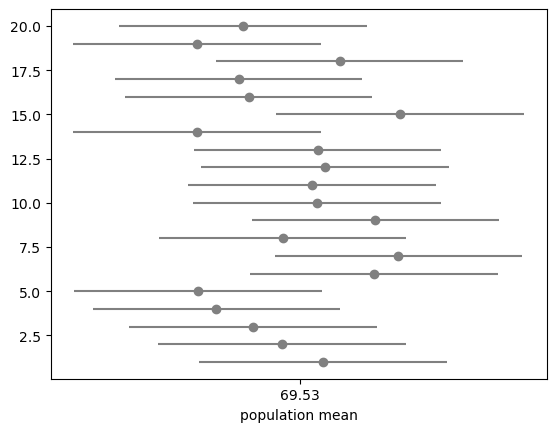

In [124]:
n = 20
p_mean = df.score.mean()
n_samp = 10000
samples = np.random.choice(df.score, (n_samp, n))
samples[:5]

# plt.vlines(p_mean, 0, 21)
for i in range(20):
    sample = np.random.choice(df.score, n)
    s_mean = sample.mean()
    lower, upper = mu_CI(sample, sigma=df.score.std(), alpha=0.05)
    if lower <= p_mean <= upper:
        plt.scatter(s_mean, 20-i, color='gray')
        plt.hlines(20-i, lower, upper, color='gray')
    else:
        plt.scatter(s_mean, 20-i, color='blue')
        plt.hlines(20-i, lower, upper, color='blue')
    
plt.xticks([p_mean])
plt.xlabel('population mean')
plt.show()

- 모분산을 아는 경우 모평균에 대한 95% 신뢰구간들

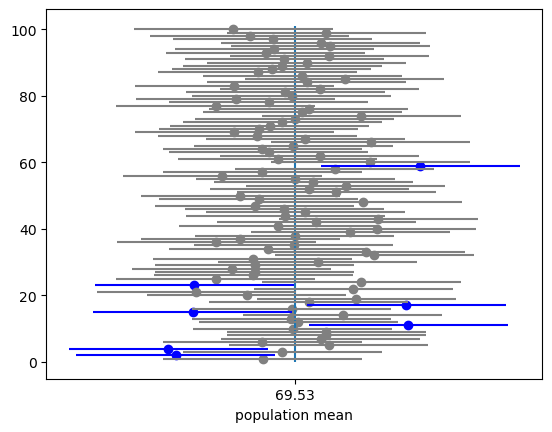

In [125]:
n_samples = 100
plt.vlines(p_mean, 0, n_samples+1)
for i in range(n_samples):
    sample = samples[i]
    s_mean = sample.mean()
    lower, upper = mu_CI(sample, sigma=df.score.std(), alpha=0.05)
    if lower <= p_mean <= upper:
        plt.scatter(s_mean, n_samples-i, color='gray')
        plt.hlines(n_samples-i, lower, upper, color='gray')
    else:
        plt.scatter(s_mean, n_samples-i, color='blue')
        plt.hlines(n_samples-i, lower, upper, color='blue')
        
plt.xticks([p_mean])
plt.xlabel('population mean')
plt.show()

- 소표본이고 모분산을 모르는 경우 모평균에 대한 95% 신뢰구간들

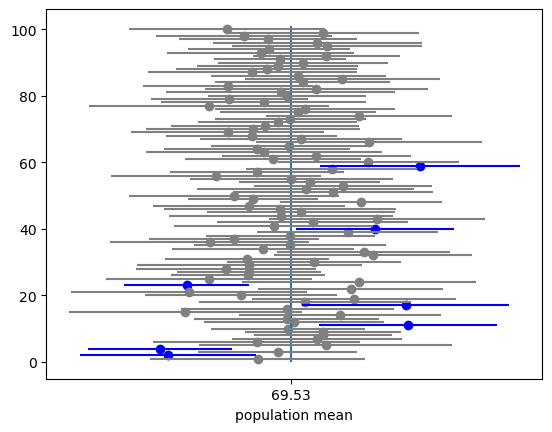

In [127]:
n_samples = 100
plt.vlines(p_mean, 0, n_samples+1)
for i in range(n_samples):
    sample = samples[i]
    s_mean = sample.mean()
    lower, upper = mu_CI(sample, alpha=0.05)
    if lower <= p_mean <= upper:
        plt.scatter(s_mean, n_samples-i, color='gray')
        plt.hlines(n_samples-i, lower, upper, color='gray')
    else:
        plt.scatter(s_mean, n_samples-i, color='blue')
        plt.hlines(n_samples-i, lower, upper, color='blue')
        
plt.xticks([p_mean])
plt.xlabel('population mean')
plt.show()

### 문제

만 7세의 어린이 중 부모의 동의를 얻은 학생 중에서 10명을 표본으로 선정하고 머리 둘레를 측정하였다. 모평균에 대한 95% 신뢰구간을 추정하시오.

In [129]:
# 표본 데이터
data = [520, 498, 481, 512, 515, 542, 520, 518, 527, 526]

#### 정규분포를 이용한 경우

In [154]:
s_mean = np.mean(data)
s_std = np.std(data)
n = len(data)
alpha = 0.05
eb = stats.norm().isf(alpha/2) * s_std / np.sqrt(n)
lower = s_mean - eb
upper = s_mean + eb
lower, upper

(506.1023, 525.6977)

In [155]:
mu_CI(np.array(data), sigma=np.std(data))

모평균에 대한 95.0% 신뢰구간 : (506.10, 525.70)


(506.1023, 525.6977)

#### t분포를 이용한 경우

In [156]:
eb = stats.t(n-1).isf(alpha/2) * s_std / np.sqrt(n)
lower = s_mean - eb
upper = s_mean + eb
lower, upper

(504.5917, 527.2083)

In [157]:
mu_CI(np.array(data))

모평균에 대한 95.0% 신뢰구간 : (504.59, 527.21)


(504.5917, 527.2083)

--------------------------------

## 2. 통계적 가설검정(test)

### 가설검정 단계

- 1단계. 가설설정 (귀무가설 vs. 대립가설)
- 2단계. 유의수준 설정
- 3단계. 검정통계량 계산
- 4단계. 임계값과 p-value 계산
- 5단계. 귀무가설 기각여부 판단

### 예제

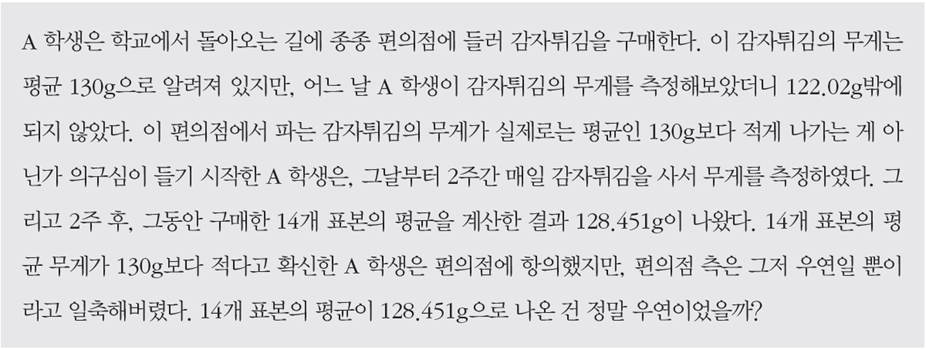

In [55]:
#감자 무게 측정 데이터

df = pd.read_csv('data/potato.csv')
df

,무게
0,122.02
1,131.73
2,130.60
3,131.82
4,132.05
5,126.12
6,124.43
7,132.89
8,122.79
9,129.95


In [57]:
#표본평균
s_mean = df.무게.mean()
s_mean

128.4507

In [71]:
#표본의 표준편차
s_std = df.무게.std()
s_std

3.9836

- 모집단 분포 : 모평균 130, 모분산 9인 경우

In [60]:
rv = stats.norm(loc=130, scale=3/np.sqrt(14))
rv.isf(0.95)

128.6812

### 단측검정의 경우

#### 1단계. 가설설정

- 귀무가설(H0) : 감자튀김의 평균무게=130g
- 대립가설(H1) : 감자튀김의 평균무게<130g

#### 2단계. 유의수준 설정

- 유의수준 α=0.05 (5%)

#### 3단계. 검정통계량 계산

- 모분산을 아는 경우 Z검정통계량 사용

In [61]:
p_mean, p_var, n = 130, 9, 14
Z = (s_mean - p_mean) / np.sqrt(p_var/n)
Z

-1.9323

#### 4단계. 임계값과 p-값 계산

- 임계값(critical region) : 귀무가설을 기각할 영역

In [64]:
stats.norm().isf(0.95)

-1.6449

- p값 계산 : 검정통계량에 의해 계산된 유의수준

In [63]:
stats.norm().cdf(Z)

0.0267

#### 5단계. 귀무가설 기각 여부 판단

- 좌측검정의 경우 귀무가설 기각 기준
    - 임계값 > 검정통계량
    - p값 < 유의수준

### 양측 검정인 경우

#### 1단계. 가설설정

- 귀무가설(H0) : 감자튀김의 평균무게=130g
- 대립가설(H1) : 감자튀김의 평균무게≠130g

#### 2단계. 유의수준 설정

- 유의수준 α=0.05 (5%)

#### 3단계. 검정통계량 계산

- 모분산을 아는 경우 Z검정통계량 사용

In [65]:
p_mean, p_var, n = 130, 9, 14
Z = (s_mean - p_mean) / np.sqrt(p_var/n)
Z

-1.9323

#### 4단계. 임계값과 p-값 계산

- 임계값(critical region) : 귀무가설을 기각할 영역

In [69]:
stats.norm().interval(0.95)

(-1.9600, 1.9600)

- p값 계산 : 검정통계량에 의해 계산된 유의수준

In [68]:
stats.norm().cdf(Z)*2

0.0533

#### 5단계. 귀무가설 기각 여부 판단

- p값(0.053) > 유의수준(0.05) 이므로 귀무가설을 기각할 수 없음

### 소표본이고 모분산을 모르는 경우

- 모분산 대신 표본분산을 사용
- t 검정통계량을 사용하여 가설 검정 수행

In [72]:
# t 검정통계량 계산
p_mean = 130
t = (s_mean-p_mean) / (s_std / np.sqrt(n))
t

-1.4552

In [73]:
# 임계값 : 단측 검정인 경우
stats.t(n-1).isf(0.95)

-1.7709

In [75]:
# p-값 계산
stats.t(n-1).cdf(t)

0.0847

=> 귀무가설 기각여부 판단 (결과) : 유의수준(0.05) < p값(큼)이므로 귀무가설 기각할 수 없음

- 양측검정인 경우

In [77]:
stats.t(n-1).interval(0.95)

(-2.1604, 2.1604)

In [78]:
# p-value
stats.t(n-1).cdf(t) *2

0.1693

=> 귀무가설 기각여부 판단 : 유의수준(0.05) < p-value(0.1693)이므로 귀무가설 기각할 수 없음

모평균 가설검정을 위한 Z-test 함수

In [95]:
def z_test(sample, p_mean, p_std=None, alpha=0.05, alternative='two'):
    s_mean = np.mean(sample)
    std = p_std if p_std else np.std(sample)
    n = len(sample)
    rv = stats.norm()
    z = (s_mean-p_mean) / (std/np.sqrt(n))

    if alternative == 'two':
        if z<0:
            p_value = rv.cdf(z)*2
        else:
            p_value = (1-rv.cdf(z))*2
    elif alternative == 'less':
        p_value = rv.cdf(z)
    elif alternative == 'greater':
        p_value = rv.isf(z)
    else:
        print('검정유형이 잘못 지정되었습니다')

    if p_value < alpha:
        print(f'Z={z:.2f}, p-value={p_value:.4f}, Reject H0')
    else:
        print(f'Z={z:.2f}, p-value={p_value:.4f}, Accept H0')

In [ ]:
def z_test(sample, p_mean, p_std=None, alpha=0.05, alternative='two'):
    s_mean = np.mean(sample)
    std = p_std if p_std else np.std(sample)
    n = len(sample)
    rv = stats.norm()
    z = (s_mean-p_mean) / (std/np.sqrt(n))

    if alternative == 'two':
        if z<0:
            p_value = rv.cdf(z)*2
        else:
            p_value = (1-rv.cdf(z))*2
    elif alternative == 'less':
        p_value = rv.cdf(z)
    elif alternative == 'greater':
        p_value = 1-rv.cdf(z)
    else:
        print('검정유형이 잘못 지정되었습니다')

    if p_value < alpha:
        print(f'Z={z:.2f}, p-value={p_value:.4f}, Reject H0')
    else:
        print(f'Z={z:.2f}, p-value={p_value:.4f}, Accept H0')

In [96]:
z_test(df.무게, p_mean = 130, p_std=3)

Z=-1.93, p-value=0.0533, Accept H0


In [97]:
z_test(df.무게, p_mean = 130)

Z=-1.51, p-value=0.1310, Accept H0


In [98]:
z_test(df.무게, p_mean = 130, p_std = 3, alternative='less')

Z=-1.93, p-value=0.0267, Reject H0


#### scipy.stats에서 제공하는 모평균에 대한 T검정

In [92]:
# t 통계량, p값
t_stats, p = stats.ttest_1samp(df.무게, 130)
t_stats, p

(-1.4552, 0.1693)

-----